# Model Evaluation

This workshop will follow through the process of predictive analytics model development.  
  
First, a predictive model development for Boston housing data.

**Regression**
1.   Dataset split
2.   Model evaluation statistics for regression
3.   Evaluate bias and varience
4.   Fine tune the model to improve the accuracy

Second, a classification model for breast cancer detection.

**Classification**
1.   Dataset split
2.   Model evaluation statistics for classification

Thirdly, cross validation analysis for cancer dataset.


In [1]:
# Load required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split

# This is to remove warnings provided by the python libraries
import warnings
warnings.filterwarnings("ignore")

c:\Users\21361535\AppData\Local\anaconda3\envs\data_analysis\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Regression

Upload Boston House dataset and load it.


In [2]:
df = pd.read_csv('tp3_boston_data.csv')  # Load the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


###Selecting your dataset split

In [4]:
df_x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
df_y = df[['medv']]

In [5]:
df_x.shape

(506, 12)

This dataset contains 506 data points. Therefore, we could select data split as train/validation as 70/30 (we will not be using test data split)

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(df_x, df_y, test_size = 0.3, random_state = 5)

### Modeling

Train a simple linear regression model

In [7]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [8]:
# Training accuracy
Y_train_predict = reg.predict(X_train)
# Validation accuracy
Y_val_predict = reg.predict(X_val)

### Model Evaluation Statistics

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
# Error calculation
error_train = np.sqrt(mean_squared_error(Y_train_predict, Y_train))
print('Training Root Mean Squared Error: ' + str(error_train))
error_val = np.sqrt(mean_squared_error(Y_val_predict, Y_val))
print('Validation Root Mean Squared Error: ' + str(error_val))

error_train = mean_absolute_error(Y_train_predict, Y_train)
print('Training Mean Absolute Error: ' + str(error_train))
error_val = mean_absolute_error(Y_val_predict, Y_val)
print('Validation Mean Absolute Error: ' + str(error_val))

error_train = r2_score(Y_train_predict, Y_train)
print('Training R2 Error: ' + str(error_train))
error_val = r2_score(Y_val_predict, Y_val)
print('Validation R2 Error: ' + str(error_val))

Training Root Mean Squared Error: 4.477298307360929
Validation Root Mean Squared Error: 5.461959116713418
Training Mean Absolute Error: 3.2174054306410658
Validation Mean Absolute Error: 3.5493213174749396
Training R2 Error: 0.6647291592059918
Validation R2 Error: 0.5481922103844171


### Analysis: Bias and Variance

Based on the evaluation metrices, it can be seen that there is a high bias in the predicted values.  
**What options we have to improve the accuracy?**  
1.  Making the model complex  
2.  ...

### Modeling a complex NN model

In [11]:
from sklearn.neural_network import MLPRegressor

In [12]:
mlp = MLPRegressor(hidden_layer_sizes=(150), max_iter=1500)

In [13]:
mlp.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=150, max_iter=1500)

In [14]:
# Training accuracy
Y_train_predict = mlp.predict(X_train)
# Validation accuracy
Y_val_predict = mlp.predict(X_val)

In [15]:
# Error calculation
error_train = np.sqrt(mean_squared_error(Y_train_predict, Y_train))
print('Training Root Mean Squared Error: ' + str(error_train))
error_val = np.sqrt(mean_squared_error(Y_val_predict, Y_val))
print('Validation Root Mean Squared Error: ' + str(error_val))

error_train = mean_absolute_error(Y_train_predict, Y_train)
print('Training Mean Absolute Error: ' + str(error_train))
error_val = mean_absolute_error(Y_val_predict, Y_val)
print('Validation Mean Absolute Error: ' + str(error_val))

error_train = r2_score(Y_train_predict, Y_train)
print('Training R2 Error: ' + str(error_train))
error_val = r2_score(Y_val_predict, Y_val)
print('Validation R2 Error: ' + str(error_val))

Training Root Mean Squared Error: 3.748332966189392
Validation Root Mean Squared Error: 4.333991368777637
Training Mean Absolute Error: 2.591081342335015
Validation Mean Absolute Error: 2.887401509696766
Training R2 Error: 0.7807366386114329
Validation R2 Error: 0.7135386909561128


## Classification

In [16]:
from sklearn.datasets import load_breast_cancer

# Load the dataset directly from sklearn sample dataset library
cancer = load_breast_cancer()

In [17]:
print(cancer.get('DESCR'))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [18]:
df_x = pd.DataFrame(cancer.get('data'),columns=cancer.get('feature_names'))
df_y = pd.DataFrame(cancer.get('target'))

In [19]:
df_x.shape

(569, 30)

In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(df_x, df_y, test_size = 0.3, random_state = 5)

### Modeling

We will model a simple logistic regression as the initial step.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
reg = LogisticRegression()
reg.fit(X_train,Y_train)

LogisticRegression()

In [23]:
# Training accuracy
Y_train_predict = reg.predict(X_train)
# Validation accuracy
Y_val_predict = reg.predict(X_val)

### Evaluation Metrics

#### Classification Accuracy

In [24]:
from sklearn.metrics import accuracy_score

# Error calculation
error_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_val_predict, Y_val)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.9396984924623115
Validation Classif Accuracy: 0.9590643274853801


#### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[137,  10],
       [ 14, 237]], dtype=int64)

#### F1-Score

In [26]:
from sklearn.metrics import f1_score

# Error calculation
error_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(error_train))
error_val = f1_score(Y_val_predict, Y_val)
print('Validation F1 Score: ' + str(error_val))

Training F1 Score: 0.9518072289156627
Validation F1 Score: 0.9683257918552037


#### Classification Report

In [27]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_val)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       147
           1       0.96      0.94      0.95       251

    accuracy                           0.94       398
   macro avg       0.93      0.94      0.94       398
weighted avg       0.94      0.94      0.94       398

Validation report
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.97      0.96      0.97       111

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



#### AUC and ROC Curve

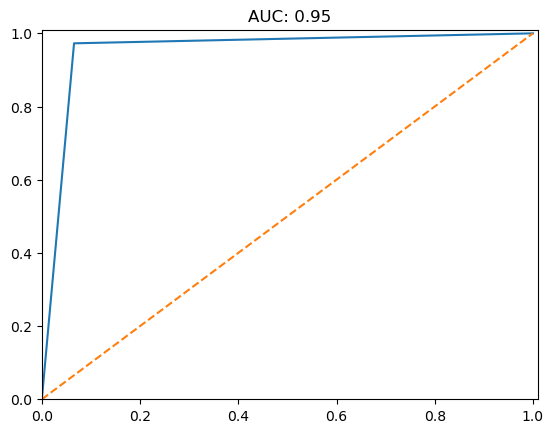

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_val, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_val, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

## k-Fold cross validation

Apply k-fold cross validation for cancer detection dataset.

In [29]:
# Load the dataset directly
cancer = load_breast_cancer()

In [30]:
df_x = pd.DataFrame(cancer.get('data'),columns=cancer.get('feature_names'))
df_y = pd.DataFrame(cancer.get('target'))
X = df_x.values
Y = df_y.values

In [31]:
from sklearn import model_selection

In [32]:
k = 10 # use 10-Fold cross validation with logistic regression
kfold = model_selection.KFold(n_splits=k)
model = LogisticRegression()

In [33]:
# Classification accuracy
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: {:.2f} ({:.2f})".format(results.mean(), results.std()))

Accuracy: 0.94 (0.04)


In [34]:
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: {:.2f} ({:.2f})".format(results.mean(), results.std()))

AUC: 0.99 (0.01)


## GridSearch based parameter tuning

In this section, it's using GridSearch strategy to find the bast parameters

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': [6, 8, 10, 11, 12], 'min_samples_split': [2, 3, 4]}
decision_tree = DecisionTreeClassifier(random_state=5)

grid_search_cv = GridSearchCV(decision_tree, params, verbose=1, cv=10)
grid_search_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_leaf_nodes': [6, 8, 10, 11, 12],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [36]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=8, random_state=5)

In [37]:
# Using best parameters from GridSearch
selection = DecisionTreeClassifier(**grid_search_cv.best_params_)

# Using user defined parameters
# selection = DecisionTreeClassifier(max_leaf_nodes=6, min_samples_split=2)

selection.fit(X_train, Y_train)
Y_train_predict = selection.predict(X_train)
Y_test_predict = selection.predict(X_val)

# Error calculation
error_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(error_train))
error_val = f1_score(Y_val_predict, Y_val)
print('Validation F1 Score: ' + str(error_val))

Training F1 Score: 0.9798387096774194
Validation F1 Score: 0.9683257918552037


## Exercise: Credit card fraud detection

Detect credit card frauds using [this](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset.